# Proyecto de pipelines de la  Premier League


## EDA de la premier league

### Instalar las Bibliotecas 

In [155]:
!pip install pandas matplotlib seaborn tabulate



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importa las bibliotecas necesarias y carga el archivo 

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import pandas as pd

#importar data 
df = pd.read_csv("PremierLeague.csv", sep=";")

#duplicar data
dfc= df.copy()


In [157]:
print(df)

                                  MatchID     Season  MatchWeek        Date  \
0              1993-1994_Arsenal_Coventry  1993-1994          1  14/08/1993   
1               1993-1994_Aston Villa_QPR  1993-1994          1  14/08/1993   
2             1993-1994_Chelsea_Blackburn  1993-1994          1  14/08/1993   
3      1993-1994_Liverpool_Sheffield Weds  1993-1994          1  14/08/1993   
4                1993-1994_Man City_Leeds  1993-1994          1  14/08/1993   
...                                   ...        ...        ...         ...   
12046        2024-2025_Man United_Ipswich  2024-2025         21  26/02/2025   
12047     2024-2025_Nott'm Forest_Arsenal  2024-2025         21  26/02/2025   
12048        2024-2025_Tottenham_Man City  2024-2025         21  26/02/2025   
12049       2024-2025_Liverpool_Newcastle  2024-2025         21  26/02/2025   
12050        2024-2025_West Ham_Leicester  2024-2025         21  27/02/2025   

        Time       HomeTeam        AwayTeam  FullTi

In [158]:
print(df.head())


                              MatchID     Season  MatchWeek        Date Time  \
0          1993-1994_Arsenal_Coventry  1993-1994          1  14/08/1993  NaN   
1           1993-1994_Aston Villa_QPR  1993-1994          1  14/08/1993  NaN   
2         1993-1994_Chelsea_Blackburn  1993-1994          1  14/08/1993  NaN   
3  1993-1994_Liverpool_Sheffield Weds  1993-1994          1  14/08/1993  NaN   
4            1993-1994_Man City_Leeds  1993-1994          1  14/08/1993  NaN   

      HomeTeam        AwayTeam  FullTimeHomeTeamGoals  FullTimeAwayTeamGoals  \
0      Arsenal        Coventry                      0                      3   
1  Aston Villa             QPR                      4                      1   
2      Chelsea       Blackburn                      1                      2   
3    Liverpool  Sheffield Weds                      2                      0   
4     Man City           Leeds                      1                      1   

  FullTimeResult  ...  MarketMaxAwayTe

In [159]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12051 entries, 0 to 12050
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MatchID                 12051 non-null  object 
 1   Season                  12051 non-null  object 
 2   MatchWeek               12051 non-null  int64  
 3   Date                    12051 non-null  object 
 4   Time                    2171 non-null   object 
 5   HomeTeam                12051 non-null  object 
 6   AwayTeam                12051 non-null  object 
 7   FullTimeHomeTeamGoals   12051 non-null  int64  
 8   FullTimeAwayTeamGoals   12051 non-null  int64  
 9   FullTimeResult          12051 non-null  object 
 10  HalfTimeHomeTeamGoals   11291 non-null  float64
 11  HalfTimeAwayTeamGoals   11291 non-null  float64
 12  HalfTimeResult          11291 non-null  object 
 13  Referee                 9391 non-null   object 
 14  HomeTeamShots           9391 non-null 

In [160]:
print( df.isnull().sum())

MatchID                      0
Season                       0
MatchWeek                    0
Date                         0
Time                      9880
HomeTeam                     0
AwayTeam                     0
FullTimeHomeTeamGoals        0
FullTimeAwayTeamGoals        0
FullTimeResult               0
HalfTimeHomeTeamGoals      760
HalfTimeAwayTeamGoals      760
HalfTimeResult             760
Referee                   2660
HomeTeamShots             2660
AwayTeamShots             2660
HomeTeamShotsOnTarget     2660
AwayTeamShotsOnTarget     2660
HomeTeamCorners           2660
AwayTeamCorners           2660
HomeTeamFouls             2660
AwayTeamFouls             2660
HomeTeamYellowCards       2660
AwayTeamYellowCards       2660
HomeTeamRedCards          2660
AwayTeamRedCards          2660
B365HomeTeam              3420
B365Draw                  3420
B365AwayTeam              3420
B365Over2.5Goals          8877
B365Under2.5Goals         8877
MarketMaxHomeTeam         9880
MarketMa

### Limpieza de las filas con valores nulos 
Se tiene una gran cantidad de columnas con valores nulos, se hace una limpieza de aquellas filas que tengan valores nulos. 

In [161]:
df = df.dropna()

print(df)

                                      MatchID     Season  MatchWeek  \
9880              2019-2020_Liverpool_Norwich  2019-2020          1   
9881              2019-2020_West Ham_Man City  2019-2020          1   
9882   2019-2020_Bournemouth_Sheffield United  2019-2020          1   
9883            2019-2020_Burnley_Southampton  2019-2020          1   
9884         2019-2020_Crystal Palace_Everton  2019-2020          1   
...                                       ...        ...        ...   
12046            2024-2025_Man United_Ipswich  2024-2025         21   
12047         2024-2025_Nott'm Forest_Arsenal  2024-2025         21   
12048            2024-2025_Tottenham_Man City  2024-2025         21   
12049           2024-2025_Liverpool_Newcastle  2024-2025         21   
12050            2024-2025_West Ham_Leicester  2024-2025         21   

             Date   Time        HomeTeam          AwayTeam  \
9880    9/08/2019  20:00       Liverpool           Norwich   
9881   10/08/2019  12:3

In [162]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2170 entries, 9880 to 12050
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MatchID                 2170 non-null   object 
 1   Season                  2170 non-null   object 
 2   MatchWeek               2170 non-null   int64  
 3   Date                    2170 non-null   object 
 4   Time                    2170 non-null   object 
 5   HomeTeam                2170 non-null   object 
 6   AwayTeam                2170 non-null   object 
 7   FullTimeHomeTeamGoals   2170 non-null   int64  
 8   FullTimeAwayTeamGoals   2170 non-null   int64  
 9   FullTimeResult          2170 non-null   object 
 10  HalfTimeHomeTeamGoals   2170 non-null   float64
 11  HalfTimeAwayTeamGoals   2170 non-null   float64
 12  HalfTimeResult          2170 non-null   object 
 13  Referee                 2170 non-null   object 
 14  HomeTeamShots           2170 non-null   f

In [163]:
print( df.isnull().sum())

MatchID                   0
Season                    0
MatchWeek                 0
Date                      0
Time                      0
HomeTeam                  0
AwayTeam                  0
FullTimeHomeTeamGoals     0
FullTimeAwayTeamGoals     0
FullTimeResult            0
HalfTimeHomeTeamGoals     0
HalfTimeAwayTeamGoals     0
HalfTimeResult            0
Referee                   0
HomeTeamShots             0
AwayTeamShots             0
HomeTeamShotsOnTarget     0
AwayTeamShotsOnTarget     0
HomeTeamCorners           0
AwayTeamCorners           0
HomeTeamFouls             0
AwayTeamFouls             0
HomeTeamYellowCards       0
AwayTeamYellowCards       0
HomeTeamRedCards          0
AwayTeamRedCards          0
B365HomeTeam              0
B365Draw                  0
B365AwayTeam              0
B365Over2.5Goals          0
B365Under2.5Goals         0
MarketMaxHomeTeam         0
MarketMaxDraw             0
MarketMaxAwayTeam         0
MarketAvgHomeTeam         0
MarketAvgDraw       

Al terminar la limpieza tendremos una base de datos con 2170 observaciones y 42 columnas. 

Visualización de como quedarían los datos después de la limpieza.

In [164]:
df


,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
9880,2019-2020_Liverpool_Norwich,2019-2020,1,9/08/2019,20:00,Liverpool,Norwich,4,1,H,...,23.00,1.14,8.75,19.83,1.45,3.11,1.41,2.92,3,0
9881,2019-2020_West Ham_Man City,2019-2020,1,10/08/2019,12:30,West Ham,Man City,0,5,A,...,1.29,11.84,6.28,1.25,1.51,2.77,1.48,2.65,0,3
9882,2019-2020_Bournemouth_Sheffield United,2019-2020,1,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,...,4.00,2.01,3.53,3.83,2.00,1.99,1.90,1.93,1,1
9883,2019-2020_Burnley_Southampton,2019-2020,1,10/08/2019,15:00,Burnley,Southampton,3,0,H,...,2.85,2.68,3.22,2.78,2.20,1.78,2.12,1.73,3,0
9884,2019-2020_Crystal Palace_Everton,2019-2020,1,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,...,2.52,3.13,3.27,2.40,2.25,1.74,2.18,1.70,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12046,2024-2025_Man United_Ipswich,2024-2025,21,26/02/2025,19:30,Man United,Ipswich,3,2,H,...,6.50,1.52,4.55,5.83,1.69,2.34,1.64,2.29,3,0
12047,2024-2025_Nott'm Forest_Arsenal,2024-2025,21,26/02/2025,19:30,Nott'm Forest,Arsenal,0,0,D,...,2.02,3.94,3.48,1.98,2.24,1.75,2.17,1.71,1,1
12048,2024-2025_Tottenham_Man City,2024-2025,21,26/02/2025,19:30,Tottenham,Man City,0,1,A,...,2.10,3.22,4.09,2.04,1.37,3.40,1.34,3.29,0,3
12049,2024-2025_Liverpool_Newcastle,2024-2025,21,26/02/2025,20:15,Liverpool,Newcastle,2,0,H,...,6.10,1.52,4.77,5.64,1.48,2.95,1.44,2.79,3,0


### Ver los nombres de las columnas 

In [165]:
print(df.columns)


Index(['MatchID', 'Season', 'MatchWeek', 'Date', 'Time', 'HomeTeam',
       'AwayTeam', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals',
       'FullTimeResult', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals',
       'HalfTimeResult', 'Referee', 'HomeTeamShots', 'AwayTeamShots',
       'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners',
       'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls',
       'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards',
       'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
       'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam',
       'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam',
       'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals',
       'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals',
       'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints'],
      dtype='object')


### Información de las columnas 

#### Información básica del partido
* MatchID: Identificador único del partido.

* Season: Temporada en la que se jugó el partido.

* MatchWeek: Jornada en la que se disputó el partido.

* Date: Fecha del partido.

* Time: Hora del partido (aunque tenía muchos valores faltantes antes de la limpieza).

#### Equipos y Resultados
* HomeTeam: Equipo local.

* AwayTeam: Equipo visitante.

* FullTimeHomeTeamGoals: Goles anotados por el equipo local.

* FullTimeAwayTeamGoals: Goles anotados por el equipo visitante.

* FullTimeResult: Resultado del partido (H = local gana, D = empate, A = visitante gana).

#### Estadísticas del Primer Tiempo
* HalfTimeHomeTeamGoals: Goles del equipo local en el primer tiempo.

* HalfTimeAwayTeamGoals: Goles del equipo visitante en el primer tiempo.

* HalfTimeResult: Resultado al medio tiempo.

#### Rendimiento del Partido
* HomeTeamShots , AwayTeamShots: Disparos de cada equipo.

* HomeTeamShotsOnTarget, AwayTeamShotsOnTarget: Disparos a puerta de cada equipo.

* HomeTeamCorners, AwayTeamCorners: Tiros de esquina.

* HomeTeamFouls, AwayTeamFouls: Faltas cometidas.

* HomeTeamYellowCards, AwayTeamYellowCards: Tarjetas amarillas.

* HomeTeamRedCards, AwayTeamRedCards: Tarjetas rojas.

#### Apuestas y Mercado de Probabilidades
* B365HomeTeam, B365Draw, B365AwayTeam: Cuotas de apuestas de Bet365. (local, empate, visitante)

* B365Over2.5Goals, B365Under2.5Goals: Cuotas de apuestas para más/menos de 2.5 goles.

* MarketMaxHomeTeam, MarketMaxDraw, MarketMaxAwayTeam: Cuotas máximas del mercado.

* MarketAvgHomeTeam, MarketAvgDraw, MarketAvgAwayTeam: Cuotas promedio del mercado. (local, empate, visitante)

* MarketMaxOver2.5Goals, MarketMaxUnder2.5Goals: Cuotas máximas para más/menos de 2.5 goles.

* MarketAvgOver2.5Goals, MarketAvgUnder2.5Goals: Cuotas promedio para más/menos de 2.5 goles.

#### Puntos Obtenidos
* HomeTeamPoints: Puntos obtenidos por el equipo local.

* AwayTeamPoints: Puntos obtenidos por el equipo visitante.


### Selección de las variables a utilizar 

* MatchID: Identificador único del partido.

* Season: Temporada en la que se jugó el partido.

* MatchWeek: Jornada en la que se disputó el partido.

* HomeTeam: Equipo local.

* AwayTeam: Equipo visitante.

* FullTimeHomeTeamGoals: Goles anotados por el equipo local.

* FullTimeAwayTeamGoals: Goles anotados por el equipo visitante.

* FullTimeResult: Resultado del partido (H = local gana, D = empate, A = visitante gana).

* HomeTeamShots: Disparos del equipo local

* AwayTeamShots: Disparos del equipo visitante.

* HomeTeamShotsOnTarget: Disparos a puerta equipo local

* AwayTeamShotsOnTarget: Disparos a puerta del equipo visitante 


In [166]:
# Lista de variables seleccionadas
selected_columns = [
    "MatchID", "Season", "MatchWeek", "HomeTeam", "Date", "Time", "AwayTeam",
    "FullTimeHomeTeamGoals", "FullTimeAwayTeamGoals", "FullTimeResult",
    "HomeTeamShots", "AwayTeamShots", "HomeTeamShotsOnTarget", "AwayTeamShotsOnTarget"
]

# Filtrar el DataFrame con las columnas seleccionadas
df = df[selected_columns]

# Verificar la estructura del nuevo DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2170 entries, 9880 to 12050
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MatchID                2170 non-null   object 
 1   Season                 2170 non-null   object 
 2   MatchWeek              2170 non-null   int64  
 3   HomeTeam               2170 non-null   object 
 4   Date                   2170 non-null   object 
 5   Time                   2170 non-null   object 
 6   AwayTeam               2170 non-null   object 
 7   FullTimeHomeTeamGoals  2170 non-null   int64  
 8   FullTimeAwayTeamGoals  2170 non-null   int64  
 9   FullTimeResult         2170 non-null   object 
 10  HomeTeamShots          2170 non-null   float64
 11  AwayTeamShots          2170 non-null   float64
 12  HomeTeamShotsOnTarget  2170 non-null   float64
 13  AwayTeamShotsOnTarget  2170 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 254.3+ K

### Identificación de las variables 

1) MatchID (object): Identificador único de cada partido.

2) Season (object): Temporada en la que se jugó el partido.

3) MatchWeek (int64): Jornada de la temporada en la que se disputó el partido.

4) HomeTeam (object): Nombre del equipo local.

5) Date (object): Fecha del partido.

6) Time (object): ora del partido  

7) AwayTeam (object): Nombre del equipo visitante.

8) FullTimeHomeTeamGoals (int64): Número de goles anotados por el equipo local en el partido.

9) FullTimeAwayTeamGoals (int64): Número de goles anotados por el equipo visitante en el partido.

10) FullTimeResult (object): Resultado del partido:
* "H" → Gana el equipo local.
* "D" → Empate.
* "A" → Gana el equipo visitante.
11) HomeTeamShots (float64): Total de disparos realizados por el equipo local.

12) AwayTeamShots (float64): Total de disparos realizados por el equipo visitante.

13) HomeTeamShotsOnTarget (float64): Disparos a puerta realizados por el equipo local.

14) AwayTeamShotsOnTarget (float64): Disparos a puerta realizados por el equipo visitante.


### Analisis de los datos 

In [167]:
# Cálculo de estadísticas básicas
estadisticas = df[['FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 
                   'HomeTeamShots', 'AwayTeamShots', 
                   'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget']].describe()

print(estadisticas)

       FullTimeHomeTeamGoals  FullTimeAwayTeamGoals  HomeTeamShots  \
count            2170.000000            2170.000000    2170.000000   
mean                1.559908               1.331336      13.879724   
std                 1.337944               1.239575       5.727145   
min                 0.000000               0.000000       1.000000   
25%                 1.000000               0.000000      10.000000   
50%                 1.000000               1.000000      13.000000   
75%                 2.000000               2.000000      17.000000   
max                 9.000000               9.000000      36.000000   

       AwayTeamShots  HomeTeamShotsOnTarget  AwayTeamShotsOnTarget  
count    2170.000000            2170.000000            2170.000000  
mean       11.672811               4.847465               4.132719  
std         5.201770               2.624890               2.425827  
min         1.000000               0.000000               0.000000  
25%         8.000000    

El análisis de los datos muestra que, en promedio, los equipos locales anotan más goles (1.56) que los visitantes (1.33), lo que sugiere una ligera ventaja del factor local. Sin embargo, la mediana de goles para ambos equipos es similar (1 gol), indicando que la mayoría de los partidos son equilibrados. En términos de disparos, los equipos locales intentan más tiros (13.88) que los visitantes (11.67), lo que refuerza la idea de una mayor ofensiva cuando se juega en casa. Además, los disparos a puerta reflejan que los locales tienen más precisión (4.85 tiros a puerta vs. 4.13 de los visitantes).

### Visualización de la distribución de goles

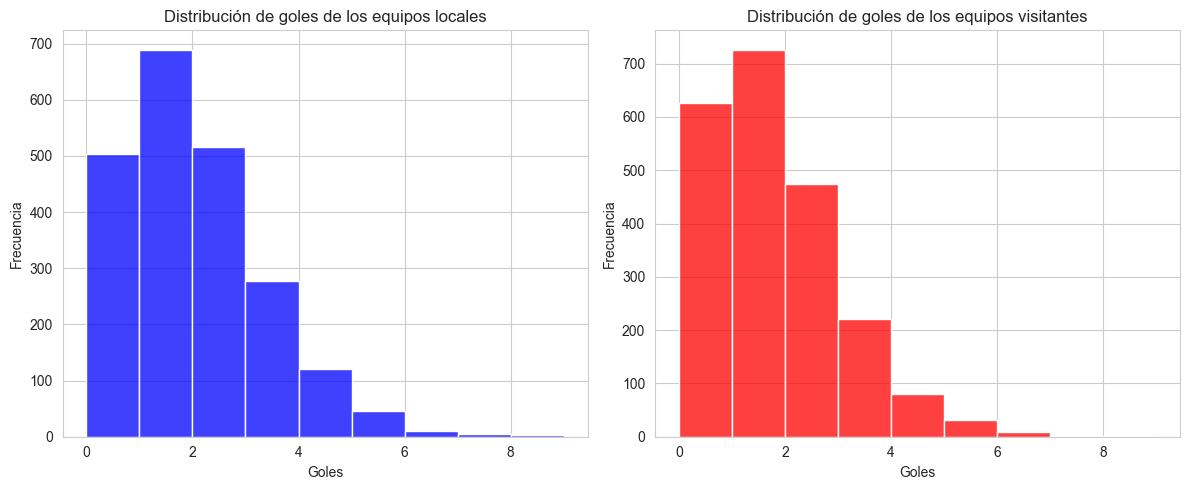

In [168]:
# Configuración del estilo de los gráficos
sns.set_style("whitegrid")

# Crear histogramas para visualizar la distribución de goles
plt.figure(figsize=(12, 5))

# Goles del equipo local
plt.subplot(1, 2, 1)
sns.histplot(df['FullTimeHomeTeamGoals'], bins=9, color="blue")
plt.title("Distribución de goles de los equipos locales")
plt.xlabel("Goles")
plt.ylabel("Frecuencia")

# Goles del equipo visitante
plt.subplot(1, 2, 2)
sns.histplot(df['FullTimeAwayTeamGoals'], bins=9, color="red")
plt.title("Distribución de goles de los equipos visitantes")
plt.xlabel("Goles")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### Visualización de disparos y disparos a puerta

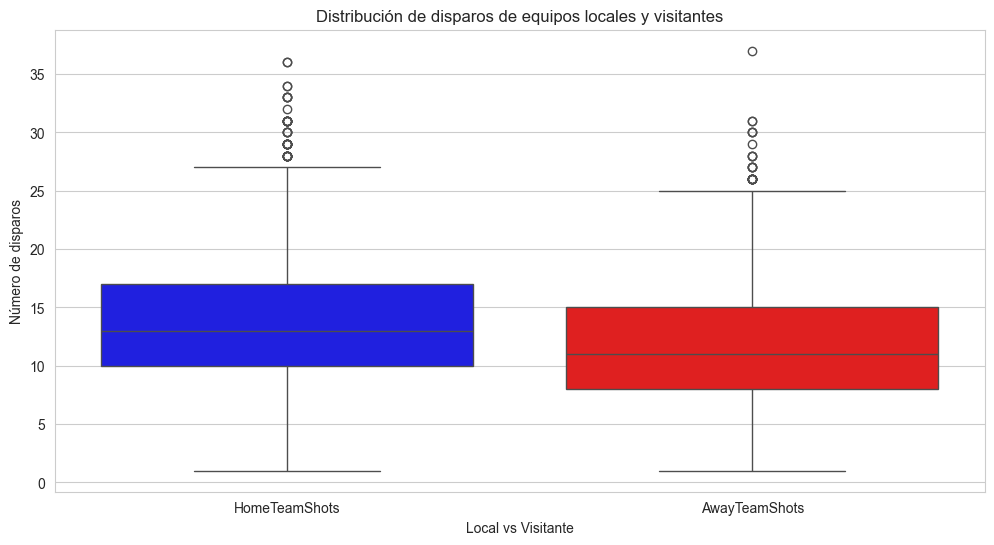

In [169]:
# Crear boxplots para visualizar los disparos
plt.figure(figsize=(12, 6))

# Disparos del equipo local y visitante
sns.boxplot(data=df[['HomeTeamShots', 'AwayTeamShots']], palette=["blue", "red"])
plt.title("Distribución de disparos de equipos locales y visitantes")
plt.ylabel("Número de disparos")
plt.xlabel("Local vs Visitante")

plt.show()


## Pipelines de premier league

In [170]:
df

,MatchID,Season,MatchWeek,HomeTeam,Date,Time,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget
9880,2019-2020_Liverpool_Norwich,2019-2020,1,Liverpool,9/08/2019,20:00,Norwich,4,1,H,15.0,12.0,7.0,5.0
9881,2019-2020_West Ham_Man City,2019-2020,1,West Ham,10/08/2019,12:30,Man City,0,5,A,5.0,14.0,3.0,9.0
9882,2019-2020_Bournemouth_Sheffield United,2019-2020,1,Bournemouth,10/08/2019,15:00,Sheffield United,1,1,D,13.0,8.0,3.0,3.0
9883,2019-2020_Burnley_Southampton,2019-2020,1,Burnley,10/08/2019,15:00,Southampton,3,0,H,10.0,11.0,4.0,3.0
9884,2019-2020_Crystal Palace_Everton,2019-2020,1,Crystal Palace,10/08/2019,15:00,Everton,0,0,D,6.0,10.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12046,2024-2025_Man United_Ipswich,2024-2025,21,Man United,26/02/2025,19:30,Ipswich,3,2,H,10.0,12.0,6.0,3.0
12047,2024-2025_Nott'm Forest_Arsenal,2024-2025,21,Nott'm Forest,26/02/2025,19:30,Arsenal,0,0,D,6.0,13.0,2.0,1.0
12048,2024-2025_Tottenham_Man City,2024-2025,21,Tottenham,26/02/2025,19:30,Man City,0,1,A,11.0,12.0,6.0,5.0
12049,2024-2025_Liverpool_Newcastle,2024-2025,21,Liverpool,26/02/2025,20:15,Newcastle,2,0,H,12.0,3.0,3.0,0.0


## Preprocesamiento de datos 

### Normalización de Nombres de Columnas
Podemos asegurarnos de que todas las columnas tienen nombres consistentes, en minúsculas y sin espacios:

In [171]:
print(dfc)

                                  MatchID     Season  MatchWeek        Date  \
0              1993-1994_Arsenal_Coventry  1993-1994          1  14/08/1993   
1               1993-1994_Aston Villa_QPR  1993-1994          1  14/08/1993   
2             1993-1994_Chelsea_Blackburn  1993-1994          1  14/08/1993   
3      1993-1994_Liverpool_Sheffield Weds  1993-1994          1  14/08/1993   
4                1993-1994_Man City_Leeds  1993-1994          1  14/08/1993   
...                                   ...        ...        ...         ...   
12046        2024-2025_Man United_Ipswich  2024-2025         21  26/02/2025   
12047     2024-2025_Nott'm Forest_Arsenal  2024-2025         21  26/02/2025   
12048        2024-2025_Tottenham_Man City  2024-2025         21  26/02/2025   
12049       2024-2025_Liverpool_Newcastle  2024-2025         21  26/02/2025   
12050        2024-2025_West Ham_Leicester  2024-2025         21  27/02/2025   

        Time       HomeTeam        AwayTeam  FullTi

### Revisar valores faltantes

In [172]:
# Contar valores nulos por columna
missing_values = dfc.isnull().sum()
print(missing_values[missing_values > 0])  # Mostrar solo las columnas con valores nulos


Time                      9880
HalfTimeHomeTeamGoals      760
HalfTimeAwayTeamGoals      760
HalfTimeResult             760
Referee                   2660
HomeTeamShots             2660
AwayTeamShots             2660
HomeTeamShotsOnTarget     2660
AwayTeamShotsOnTarget     2660
HomeTeamCorners           2660
AwayTeamCorners           2660
HomeTeamFouls             2660
AwayTeamFouls             2660
HomeTeamYellowCards       2660
AwayTeamYellowCards       2660
HomeTeamRedCards          2660
AwayTeamRedCards          2660
B365HomeTeam              3420
B365Draw                  3420
B365AwayTeam              3420
B365Over2.5Goals          8877
B365Under2.5Goals         8877
MarketMaxHomeTeam         9880
MarketMaxDraw             9880
MarketMaxAwayTeam         9880
MarketAvgHomeTeam         9880
MarketAvgDraw             9880
MarketAvgAwayTeam         9880
MarketMaxOver2.5Goals     9880
MarketMaxUnder2.5Goals    9880
MarketAvgOver2.5Goals     9880
MarketAvgUnder2.5Goals    9880
dtype: i

In [173]:
dfc.isnull().sum(axis=1).value_counts()


13    5456
0     2170
29    1900
11    1004
32     760
16     760
2        1
Name: count, dtype: int64

### Decidir si eliminamos filas
Si pocas filas tienen nulos, podemos eliminarlas sin afectar mucho los dato

In [174]:
dfc.dropna(inplace=True)


In [175]:
dfc

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
9880,2019-2020_Liverpool_Norwich,2019-2020,1,9/08/2019,20:00,Liverpool,Norwich,4,1,H,...,23.00,1.14,8.75,19.83,1.45,3.11,1.41,2.92,3,0
9881,2019-2020_West Ham_Man City,2019-2020,1,10/08/2019,12:30,West Ham,Man City,0,5,A,...,1.29,11.84,6.28,1.25,1.51,2.77,1.48,2.65,0,3
9882,2019-2020_Bournemouth_Sheffield United,2019-2020,1,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,...,4.00,2.01,3.53,3.83,2.00,1.99,1.90,1.93,1,1
9883,2019-2020_Burnley_Southampton,2019-2020,1,10/08/2019,15:00,Burnley,Southampton,3,0,H,...,2.85,2.68,3.22,2.78,2.20,1.78,2.12,1.73,3,0
9884,2019-2020_Crystal Palace_Everton,2019-2020,1,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,...,2.52,3.13,3.27,2.40,2.25,1.74,2.18,1.70,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12046,2024-2025_Man United_Ipswich,2024-2025,21,26/02/2025,19:30,Man United,Ipswich,3,2,H,...,6.50,1.52,4.55,5.83,1.69,2.34,1.64,2.29,3,0
12047,2024-2025_Nott'm Forest_Arsenal,2024-2025,21,26/02/2025,19:30,Nott'm Forest,Arsenal,0,0,D,...,2.02,3.94,3.48,1.98,2.24,1.75,2.17,1.71,1,1
12048,2024-2025_Tottenham_Man City,2024-2025,21,26/02/2025,19:30,Tottenham,Man City,0,1,A,...,2.10,3.22,4.09,2.04,1.37,3.40,1.34,3.29,0,3
12049,2024-2025_Liverpool_Newcastle,2024-2025,21,26/02/2025,20:15,Liverpool,Newcastle,2,0,H,...,6.10,1.52,4.77,5.64,1.48,2.95,1.44,2.79,3,0


### Convertir Tipos de Datos
Convertimos la columna date a formato datetime y aseguramos que las columnas numéricas sean del tipo correcto

In [176]:
print(dfc.columns)


Index(['MatchID', 'Season', 'MatchWeek', 'Date', 'Time', 'HomeTeam',
       'AwayTeam', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals',
       'FullTimeResult', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals',
       'HalfTimeResult', 'Referee', 'HomeTeamShots', 'AwayTeamShots',
       'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners',
       'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls',
       'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards',
       'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
       'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam',
       'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam',
       'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals',
       'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals',
       'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints'],
      dtype='object')


In [177]:
# Cambia el nombre
dfc.rename(columns={'Date': 'date'}, inplace=True)  

# Convierte a datetime
dfc['date'] = pd.to_datetime(dfc['date'], format='%d/%m/%Y', errors='coerce')  # Convierte a datetime


# Convertir columnas numéricas
num_cols = ['FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 
            'HomeTeamPoints', 'AwayTeamPoints', 'MatchWeek']

dfc[num_cols] = dfc[num_cols].apply(pd.to_numeric, errors='coerce')



In [178]:
dfc

,MatchID,Season,MatchWeek,date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
9880,2019-2020_Liverpool_Norwich,2019-2020,1,2019-08-09,20:00,Liverpool,Norwich,4,1,H,...,23.00,1.14,8.75,19.83,1.45,3.11,1.41,2.92,3,0
9881,2019-2020_West Ham_Man City,2019-2020,1,2019-08-10,12:30,West Ham,Man City,0,5,A,...,1.29,11.84,6.28,1.25,1.51,2.77,1.48,2.65,0,3
9882,2019-2020_Bournemouth_Sheffield United,2019-2020,1,2019-08-10,15:00,Bournemouth,Sheffield United,1,1,D,...,4.00,2.01,3.53,3.83,2.00,1.99,1.90,1.93,1,1
9883,2019-2020_Burnley_Southampton,2019-2020,1,2019-08-10,15:00,Burnley,Southampton,3,0,H,...,2.85,2.68,3.22,2.78,2.20,1.78,2.12,1.73,3,0
9884,2019-2020_Crystal Palace_Everton,2019-2020,1,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,...,2.52,3.13,3.27,2.40,2.25,1.74,2.18,1.70,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12046,2024-2025_Man United_Ipswich,2024-2025,21,2025-02-26,19:30,Man United,Ipswich,3,2,H,...,6.50,1.52,4.55,5.83,1.69,2.34,1.64,2.29,3,0
12047,2024-2025_Nott'm Forest_Arsenal,2024-2025,21,2025-02-26,19:30,Nott'm Forest,Arsenal,0,0,D,...,2.02,3.94,3.48,1.98,2.24,1.75,2.17,1.71,1,1
12048,2024-2025_Tottenham_Man City,2024-2025,21,2025-02-26,19:30,Tottenham,Man City,0,1,A,...,2.10,3.22,4.09,2.04,1.37,3.40,1.34,3.29,0,3
12049,2024-2025_Liverpool_Newcastle,2024-2025,21,2025-02-26,20:15,Liverpool,Newcastle,2,0,H,...,6.10,1.52,4.77,5.64,1.48,2.95,1.44,2.79,3,0


### Revisar y eliminar columnas irrelevantes
Podemos descartar columnas como time si no aporta al análisis.

In [179]:
dfc = dfc.drop(columns=['Time'])  # Eliminar la columna 'time'


### Verificar y eliminar duplicados

In [180]:
# Revisar duplicados
duplicados = dfc.duplicated().sum()
print(f"Duplicados en la data: {duplicados}")

# Eliminar duplicados si los hay
dfc = dfc.drop_duplicates()


Duplicados en la data: 0


### codigo completo 

In [ ]:
print(dfc)

# Contar valores nulos por columna
missing_values = dfc.isnull().sum()
print(missing_values[missing_values > 0])  # Mostrar solo las columnas con valores nulos

dfc.dropna(inplace=True)

# Cambia el nombre
dfc.rename(columns={'Date': 'date'}, inplace=True)  

# Convierte a datetime
dfc['date'] = pd.to_datetime(dfc['date'], format='%d/%m/%Y', errors='coerce')  # Convierte a datetime


# Convertir columnas numéricas
num_cols = ['FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 
            'HomeTeamPoints', 'AwayTeamPoints', 'MatchWeek']

dfc[num_cols] = dfc[num_cols].apply(pd.to_numeric, errors='coerce')

dfc = dfc.drop(columns=['Time'])  # Eliminar la columna 'time'

# Revisar duplicados
duplicados = dfc.duplicated().sum()
print(f"Duplicados en la data: {duplicados}")

# Eliminar duplicados si los hay
dfc = dfc.drop_duplicates()

